In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)
tqdm.tqdm.pandas()

In [2]:
%%time
main_data_df = pd.read_csv('./Prepped Data/main_data_new_building_merge_land_specs_20211228.csv')
print(main_data_df.shape)
main_data_df.head()

<string>:2: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.


(5006836, 33)
Wall time: 19.1 s


,시군구,지번,본번,부번,건물/단지명,거래유형,전용면적(㎡),거래/보증금(만원),월세(만원),층,건축년도,도로명,부동산유형,가격범위,건물단지명_키워드,브랜드,대장구분명,지목,x좌표,y좌표,계약날짜,계약날짜일수_2006년기준,지번주소,토지일련번호,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,데이터기준일자
0,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,33.18,15900,0,1,1992,개포로109길 9,아파트,14000~16000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-03,2,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29
1,서울특별시 강남구 개포동,12,12,0,삼익대청아파트,매매,39.53,24800,0,5,1992,개포로109길 21,아파트,24000~26000,삼익대청,기타,일반,대,206607.181143,443586.061143,2006-01-07,6,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29
2,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,39.53,24700,0,12,1992,개포로109길 9,아파트,24000~26000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-09,8,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29
3,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,49.86,33300,0,11,1992,개포로109길 9,아파트,32000~34000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-09,8,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29
4,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,39.53,24700,0,4,1992,개포로109길 9,아파트,24000~26000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-10,9,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29


In [3]:
main_data_df['구'] = main_data_df['시군구'].apply(lambda x: x.split(' ')[1])
main_data_df['동'] = main_data_df['시군구'].apply(lambda x: x.split(' ')[2])

In [4]:
main_data_df['층'] = main_data_df['층'].astype('Int64')

In [5]:
main_data_df['건축년도'] = main_data_df['건축년도'].astype('Int64')

In [6]:
main_data_df['계약날짜일수_2006년기준'] = main_data_df['계약날짜일수_2006년기준'].astype('Int64')

In [7]:
main_data_df.head()

,시군구,지번,본번,부번,건물/단지명,거래유형,전용면적(㎡),거래/보증금(만원),월세(만원),층,건축년도,도로명,부동산유형,가격범위,건물단지명_키워드,브랜드,대장구분명,지목,x좌표,y좌표,계약날짜,계약날짜일수_2006년기준,지번주소,토지일련번호,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,데이터기준일자,구,동
0,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,33.18,15900,0,1,1992,개포로109길 9,아파트,14000~16000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-03,2,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29,강남구,개포동
1,서울특별시 강남구 개포동,12,12,0,삼익대청아파트,매매,39.53,24800,0,5,1992,개포로109길 21,아파트,24000~26000,삼익대청,기타,일반,대,206607.181143,443586.061143,2006-01-07,6,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29,강남구,개포동
2,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,39.53,24700,0,12,1992,개포로109길 9,아파트,24000~26000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-09,8,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29,강남구,개포동
3,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,49.86,33300,0,11,1992,개포로109길 9,아파트,32000~34000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-09,8,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29,강남구,개포동
4,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,39.53,24700,0,4,1992,개포로109길 9,아파트,24000~26000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-10,9,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29,강남구,개포동


In [8]:
main_data_df.isna().sum()

시군구               0
지번                0
본번                0
부번                0
건물/단지명            0
거래유형              0
전용면적(㎡)           0
거래/보증금(만원)        0
월세(만원)            0
층                 0
건축년도              0
도로명               0
부동산유형             0
가격범위              0
건물단지명_키워드         0
브랜드               0
대장구분명             0
지목                0
x좌표               0
y좌표               0
계약날짜              0
계약날짜일수_2006년기준    0
지번주소              0
토지일련번호            0
지목명               0
토지면적              0
용도지역명1            0
용도지역명2            0
토지이동상황            0
지형높이              0
지형형상              0
도로접면              0
데이터기준일자           0
구                 0
동                 0
dtype: int64

In [9]:
main_data_df['주소_건축년도'] = main_data_df['시군구'] + ' ' + main_data_df['지번'].astype('str') + ' ' + main_data_df['건축년도'].astype('str')

<AxesSubplot:>

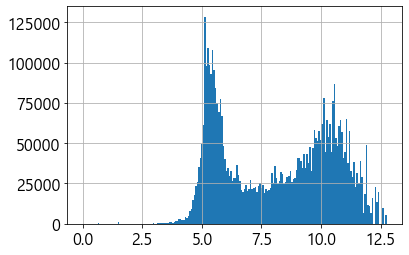

In [10]:
main_data_df['토지면적'].apply(np.log).hist(bins=200)

<AxesSubplot:>

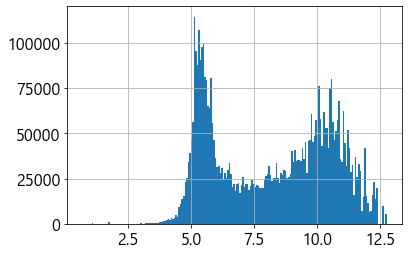

In [11]:
main_data_df['토지면적'].apply(np.log1p).hist(bins=200)

In [12]:
main_data_df['토지면적_log'] = main_data_df['토지면적'].apply(np.log)

In [13]:
main_data_df['건축년도'].value_counts()

2003    300832
2002    284446
2004    278358
2005    177366
2008    176479
1988    175953
2001    169452
2000    165053
1999    156144
2012    142601
2011    134697
1997    132844
2013    131171
1993    130794
1992    127954
2014    127171
2006    124343
2016    124269
1998    120227
2007    116580
1986    113139
1994    111121
1996    108876
2015    107877
1991    100427
2009     98544
1995     98523
2010     97996
1987     96700
2017     95362
2018     85221
1989     78447
2019     76580
1990     65562
2020     51993
1983     42051
1985     34569
1984     33876
1982     32637
1978     31615
1979     25976
1980     22445
2021     21611
1981     21451
1976     10919
1977     10566
1974      9556
1971      8139
1975      7942
1973      3598
1970      2096
1972      1555
1969      1141
1968       877
1965       383
1966       287
1961       124
1967       123
1956        94
1964        39
1963        29
1962         8
1959         8
1960         7
1940         5
1925         5
1955      

In [14]:
main_data_df['건축년도'] = main_data_df['건축년도'].apply(lambda x: '1980이하' if x <= 1980 else str(x))

In [15]:
main_data_df['건축년도'].value_counts()

2003      300832
2002      284446
2004      278358
2005      177366
2008      176479
1988      175953
2001      169452
2000      165053
1999      156144
2012      142601
1980이하    137539
2011      134697
1997      132844
2013      131171
1993      130794
1992      127954
2014      127171
2006      124343
2016      124269
1998      120227
2007      116580
1986      113139
1994      111121
1996      108876
2015      107877
1991      100427
2009       98544
1995       98523
2010       97996
1987       96700
2017       95362
2018       85221
1989       78447
2019       76580
1990       65562
2020       51993
1983       42051
1985       34569
1984       33876
1982       32637
2021       21611
1981       21451
Name: 건축년도, dtype: int64

In [17]:
main_data_df['층'].value_counts()

 2     654785
 3     634417
 4     548530
 5     417908
 1     378176
 6     272514
 7     236194
 8     217113
 9     207229
 10    197042
 11    180793
 12    171725
 13    150369
 14    138641
 15    123024
-1      77805
 16     66263
 17     60831
 18     54127
 19     44606
 20     37320
 21     26782
 22     22744
 23     18629
 24     14554
 25     11529
 26      7429
 27      6272
 28      5101
 29      4127
 30      3181
 31      2595
 32      2225
 33      1904
 0       1602
 34      1602
 35      1332
 36       968
 37       642
 38       583
 39       487
 41       343
 40       343
 42       283
 43       255
 44       217
 46       190
 45       182
 47       167
-2        155
 48       125
 49       122
 51        85
 50        75
 54        73
 53        71
 52        70
 58        52
-3         40
 55        38
 57        35
 60        30
 63        28
 59        26
 56        25
 66        24
 64        16
 62        15
 68        13
 61        12
 67        11
 65   

In [18]:
def floor_feature_engi(x):
    # x is a number
    
    if x < 0:
        return '지하'
    elif x >= 30:
        return '30층이상'
    else:
        return str(x)

In [19]:
main_data_df['층'] = main_data_df['층'].apply(floor_feature_engi)

In [20]:
main_data_df['층'].value_counts()

2        654785
3        634417
4        548530
5        417908
1        378176
6        272514
7        236194
8        217113
9        207229
10       197042
11       180793
12       171725
13       150369
14       138641
15       123024
지하        78006
16        66263
17        60831
18        54127
19        44606
20        37320
21        26782
22        22744
23        18629
30층이상     18454
24        14554
25        11529
26         7429
27         6272
28         5101
29         4127
0          1602
Name: 층, dtype: int64

In [21]:
main_data_df.head()

,시군구,지번,본번,부번,건물/단지명,거래유형,전용면적(㎡),거래/보증금(만원),월세(만원),층,건축년도,도로명,부동산유형,가격범위,건물단지명_키워드,브랜드,대장구분명,지목,x좌표,y좌표,계약날짜,계약날짜일수_2006년기준,지번주소,토지일련번호,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,데이터기준일자,구,동,주소_건축년도,토지면적_log
0,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,33.18,15900,0,1,1992,개포로109길 9,아파트,14000~16000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-03,2,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29,강남구,개포동,서울특별시 강남구 개포동 12 1992,11.70388
1,서울특별시 강남구 개포동,12,12,0,삼익대청아파트,매매,39.53,24800,0,5,1992,개포로109길 21,아파트,24000~26000,삼익대청,기타,일반,대,206607.181143,443586.061143,2006-01-07,6,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29,강남구,개포동,서울특별시 강남구 개포동 12 1992,11.70388
2,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,39.53,24700,0,12,1992,개포로109길 9,아파트,24000~26000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-09,8,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29,강남구,개포동,서울특별시 강남구 개포동 12 1992,11.70388
3,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,49.86,33300,0,11,1992,개포로109길 9,아파트,32000~34000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-09,8,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29,강남구,개포동,서울특별시 강남구 개포동 12 1992,11.70388
4,서울특별시 강남구 개포동,12,12,0,성원대치2단지아파트,매매,39.53,24700,0,4,1992,개포로109길 9,아파트,24000~26000,성원대치단지,기타,일반,대,206607.181143,443586.061143,2006-01-10,9,서울특별시 강남구 개포동 12,5864,대,121040.4,제3종일반주거지역,지정되지않음,아파트,평지,부정형,광대소각,2021-07-29,강남구,개포동,서울특별시 강남구 개포동 12 1992,11.70388


In [22]:
cat_cols = ['거래유형', '층', '건축년도', '부동산유형', '브랜드', '대장구분명', '지목명', '용도지역명1', '용도지역명2',
            '토지이동상황', '지형높이', '지형형상', '도로접면', '구', '동']

In [23]:
for col in tqdm.tqdm_notebook(cat_cols):
    unique_cats = main_data_df[col].unique()
    
    # mapping
    cat_map = {}
    for i, v in enumerate(unique_cats):
        cat_map[v] = i
        
    main_data_df[col] = main_data_df[col].map(cat_map)
    
    map_df = pd.DataFrame(cat_map, index=[0])
    map_df.to_excel('./Training/Training2_20211230/cat_col_maps/{}'.format(col+'.xlsx'), index=False)

c:\users\max6296\ml\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/15 [00:00<?, ?it/s]

In [24]:
training_data_df = main_data_df[['주소_건축년도', '전용면적(㎡)', '월세(만원)', 'x좌표', 'y좌표', '계약날짜', '계약날짜일수_2006년기준', '토지면적_log'] + cat_cols + ['거래/보증금(만원)']]
print(training_data_df.shape)
training_data_df.head()

(5006836, 24)


,주소_건축년도,전용면적(㎡),월세(만원),x좌표,y좌표,계약날짜,계약날짜일수_2006년기준,토지면적_log,거래유형,층,건축년도,부동산유형,브랜드,대장구분명,지목명,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,구,동,거래/보증금(만원)
0,서울특별시 강남구 개포동 12 1992,33.18,0,206607.181143,443586.061143,2006-01-03,2,11.70388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15900
1,서울특별시 강남구 개포동 12 1992,39.53,0,206607.181143,443586.061143,2006-01-07,6,11.70388,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,24800
2,서울특별시 강남구 개포동 12 1992,39.53,0,206607.181143,443586.061143,2006-01-09,8,11.70388,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,24700
3,서울특별시 강남구 개포동 12 1992,49.86,0,206607.181143,443586.061143,2006-01-09,8,11.70388,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,33300
4,서울특별시 강남구 개포동 12 1992,39.53,0,206607.181143,443586.061143,2006-01-10,9,11.70388,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,24700


In [26]:
training_data_df['x좌표'] = training_data_df['x좌표'] / 100000
training_data_df['y좌표'] = training_data_df['y좌표'] / 100000

In [27]:
training_data_df.head()

,주소_건축년도,전용면적(㎡),월세(만원),x좌표,y좌표,계약날짜,계약날짜일수_2006년기준,토지면적_log,거래유형,층,건축년도,부동산유형,브랜드,대장구분명,지목명,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,구,동,거래/보증금(만원)
0,서울특별시 강남구 개포동 12 1992,33.18,0,2.066072,4.435861,2006-01-03,2,11.70388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15900
1,서울특별시 강남구 개포동 12 1992,39.53,0,2.066072,4.435861,2006-01-07,6,11.70388,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,24800
2,서울특별시 강남구 개포동 12 1992,39.53,0,2.066072,4.435861,2006-01-09,8,11.70388,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,24700
3,서울특별시 강남구 개포동 12 1992,49.86,0,2.066072,4.435861,2006-01-09,8,11.70388,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,33300
4,서울특별시 강남구 개포동 12 1992,39.53,0,2.066072,4.435861,2006-01-10,9,11.70388,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,24700


In [28]:
%%time
training_data_df.to_csv('./Prepped Data/training_data_20211230.csv', index=False)

Wall time: 26.5 s
